### Role of random_state in make_classification()
The random_state parameter controls the randomness in data generation, ensuring reproducibility.

### Why Use random_state? 
- ✔ Ensures Consistency: Running the code multiple times produces the same dataset.
- ✔ Makes Debugging Easier: Without random_state, the dataset changes every time, making it hard to debug models.
- ✔ Useful for Comparisons: If you're testing multiple models, keeping the dataset fixed ensures fair comparisons.

### Example: Without random_state
If we generate a dataset without setting random_state, the dataset will change each time we run the code:

In [2]:
from sklearn.datasets import make_classification

X1, y1 = make_classification(n_samples=10, n_features=2,n_informative=2,n_redundant=0)
X2, y2 = make_classification(n_samples=10, n_features=2,n_informative=2,n_redundant=0)

print((X1 == X2).all())  # Output: False (Datasets are different)


False


### Example: With random_state
Setting random_state=42 ensures the same dataset is generated every time:

In [4]:
X1, y1 = make_classification(n_samples=10, n_features=2, n_informative=2,n_redundant=0,random_state=42)
X2, y2 = make_classification(n_samples=10, n_features=2,n_informative=2,n_redundant=0 ,random_state=42)

print((X1 == X2).all())  # Output: True (Datasets are identical)


True


### When Should You Set random_state?
- ✔ Always set it when developing & testing models for reproducibility.
- ✔ If you're running experiments and need the same results across runs.
- ❌ Don't set it when you need a randomized dataset every time (e.g., real-world applications).

### Can Different random_state Values Affect the Output?
### Yes! Changing the random_state can affect the output in multiple ways:

- In make_classification() → It affects the generated dataset (feature values and class distribution).
- In train-test splitting → It changes how data is divided, affecting model performance.
- In model training (for some ML models) → It affects randomness in optimization (like in neural networks or decision trees).

### Example 1: Different random_state Values in make_classification()
Changing random_state changes the dataset, which can affect model performance.

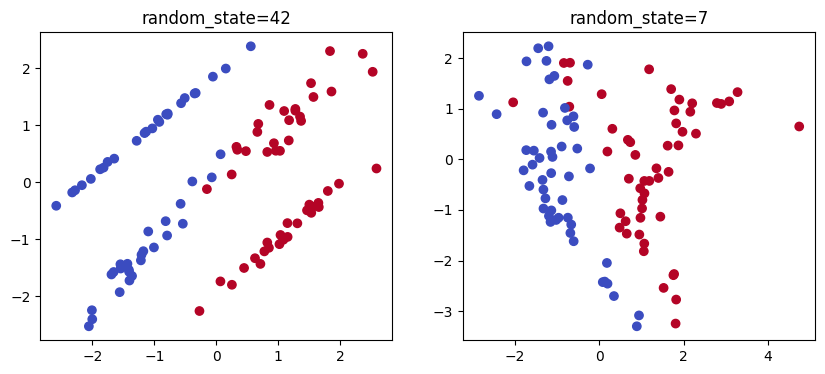

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate two datasets with different random states
X1, y1 = make_classification(n_samples=100, n_features=2,n_informative=2,n_redundant=0, random_state=42)
X2, y2 = make_classification(n_samples=100, n_features=2,n_informative=2,n_redundant=0 ,random_state=7)

# Plot datasets
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap="coolwarm")
plt.title("random_state=42")

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap="coolwarm")
plt.title("random_state=7")

plt.show()


### Example 2: Different random_state in Train-Test Split
Changing random_state in train_test_split affects which data points go into training and testing.

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.arange(10).reshape(-1, 1)
y = np.arange(10)

# Split dataset with different random states
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=7)

print("Train set (random_state=42):", y_train1)
print("Train set (random_state=7):", y_train2)


Train set (random_state=42): [0 7 2 9 4 3 6]
Train set (random_state=7): [2 1 9 7 3 6 4]


### Observation: The train-test split will be different for each random_state, affecting model performance.



### Example 3: Effect on Model Performance

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=500, n_features=5, random_state=42)

# Train and evaluate with two different random states
for state in [42, 7]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy (random_state={state}): {accuracy_score(y_test, y_pred):.3f}")


Accuracy (random_state=42): 0.900
Accuracy (random_state=7): 0.893


###🔹 Observation:

- Different random_state values cause different train-test splits, leading to slightly different accuracy scores.
- This can affect hyperparameter tuning and final model performance.

# Which random_state Value is Preferred?
There is no universally "best" value for random_state, but here’s how to choose one based on your needs:



### 1️⃣ For Reproducibility → Use Any Fixed Integer (e.g., 42)
If you want your dataset, train-test splits, or model behavior to be the same every time, set random_state to any fixed integer.

### 2️⃣ For Model Evaluation → Try Multiple Values
- If you want to check how much randomness affects your model, run the model with different random_state values and average the results.

🔹 Example: Running Multiple random_state Values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=5, random_state=42)

# Try multiple random states
accuracies = []
for state in [0, 7, 21, 42, 100]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.3f}")


Average Accuracy: 0.892


### 3️⃣ For Production → Avoid Fixing random_state
If your model is going to be used in real-world applications, do not fix random_state unless required.
This ensures the model generalizes well and does not depend on a specific data split.

🔹 Example: No random_state in Production

### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # No random_state


### Use Case vs 	                            Preferred random_state Value
- Reproducibility (debugging, research) ->	    Any fixed integer (e.g., 42)
- Model evaluation (avoiding bias)	  ->      Test multiple values (0, 7, 21, 42, 100)
- Real-world applications (production)  ->	    No fixed random_state

### Which One Should You Use?
- ✔ For debugging & research → 42
- ✔ For testing model stability → Try different values
- ✔ For production → Don’t fix it